In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression

#### | Data Extraction |

In [2]:
def read_data():
    data = pd.read_csv ("D:/Data Science/Tabelue/Data.csv")
    return data

In [3]:
data = read_data()
print(data.head())

   surface  rooms_new  zipcode_new price_new   latitude  longitude
0    138.0        4.0         1060    420000  40.804673 -73.963420
1    130.0        5.0         1087    550000  52.355590   5.000561
2    116.0        5.0         1061    425000  52.373044   4.837568
3     92.0        5.0         1035    349511  52.416895   4.906767
4    127.0        4.0         1013   1050000  52.396789   4.876607


#### | Processing Data |

In [4]:
print("The number of rows and columns -",data.shape)

The number of rows and columns - (2191, 6)


In [5]:
print ("The data types - \n ", data.dtypes)

The data types - 
  surface        float64
rooms_new      float64
zipcode_new      int64
price_new       object
latitude       float64
longitude      float64
dtype: object


In [6]:
print("The mumber of missing records -")
data.isnull().sum()

The mumber of missing records -


surface         0
rooms_new      28
zipcode_new     0
price_new       0
latitude        0
longitude       0
dtype: int64

In [7]:
df = data.copy()
print(df.head(2))

   surface  rooms_new  zipcode_new price_new   latitude  longitude
0    138.0        4.0         1060    420000  40.804673 -73.963420
1    130.0        5.0         1087    550000  52.355590   5.000561


In [8]:
mean = df['rooms_new'].mean()
median = df['rooms_new'].median()
median

3.0

In [9]:
df['rooms_new'].fillna(median)

0       4.0
1       5.0
2       5.0
3       5.0
4       4.0
       ... 
2186    3.0
2187    3.0
2188    3.0
2189    3.0
2190    2.0
Name: rooms_new, Length: 2191, dtype: float64

In [10]:
df.isnull().sum()

surface         0
rooms_new      28
zipcode_new     0
price_new       0
latitude        0
longitude       0
dtype: int64

In [11]:
df['rooms_new']=df['rooms_new'].fillna(median)
df

,surface,rooms_new,zipcode_new,price_new,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607
...,...,...,...,...,...,...
2186,12.0,3.0,1019,40000,52.372858,4.938828
2187,12.0,3.0,1019,40000,52.372858,4.938828
2188,12.0,3.0,1019,40000,52.372858,4.938828
2189,12.0,3.0,1019,40000,52.372858,4.938828


In [12]:
df.isnull().sum()

surface        0
rooms_new      0
zipcode_new    0
price_new      0
latitude       0
longitude      0
dtype: int64

In [13]:
df.head()

,surface,rooms_new,zipcode_new,price_new,latitude,longitude
0,138.0,4.0,1060,420000,40.804673,-73.963420
1,130.0,5.0,1087,550000,52.355590,5.000561
2,116.0,5.0,1061,425000,52.373044,4.837568
3,92.0,5.0,1035,349511,52.416895,4.906767
4,127.0,4.0,1013,1050000,52.396789,4.876607


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lable_encoder = LabelEncoder()
df['price_new'] = lable_encoder.fit_transform(df['price_new'])

In [16]:
df.dtypes

surface        float64
rooms_new      float64
zipcode_new      int64
price_new        int32
latitude       float64
longitude      float64
dtype: object

#### |Exploratary Analysis |

In [17]:
print(df.describe())

           surface    rooms_new  zipcode_new    price_new     latitude  \
count  2191.000000  2191.000000  2191.000000  2191.000000  2191.000000   
mean    107.827596     3.653583  1057.685988   257.574623    52.072183   
std      70.531668     1.549204    29.065993   119.675844     1.808644   
min       4.262000     0.000000  1011.000000     0.000000    40.803320   
25%      64.000000     3.000000  1025.000000   168.000000    52.351124   
50%      91.000000     3.000000  1061.000000   259.000000    52.361286   
75%     130.000000     4.000000  1079.000000   344.000000    52.373386   
max     690.000000     9.000000  1109.000000   487.000000    52.423834   

         longitude  
count  2191.000000  
mean      2.911381  
std      12.338660  
min     -73.963962  
25%       4.854486  
50%       4.885109  
75%       4.918091  
max       5.014093  


<Axes: xlabel='price_new'>

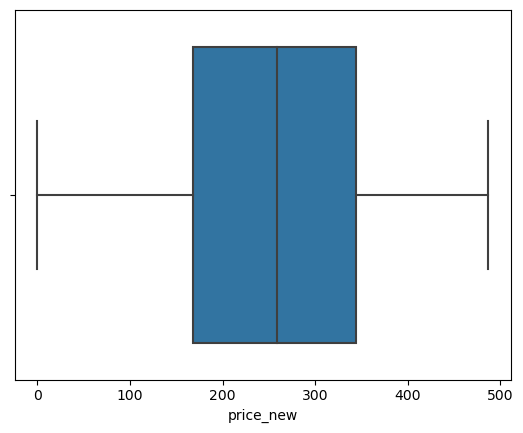

In [18]:
sns.boxplot(x = df['price_new'])

<Axes: >

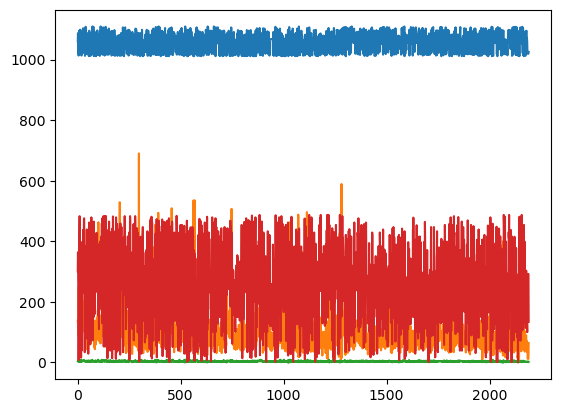

In [19]:
df['zipcode_new'].plot()
df['surface'].plot()
df['rooms_new'].plot()
df['price_new'].plot()

<Axes: xlabel='surface', ylabel='price_new'>

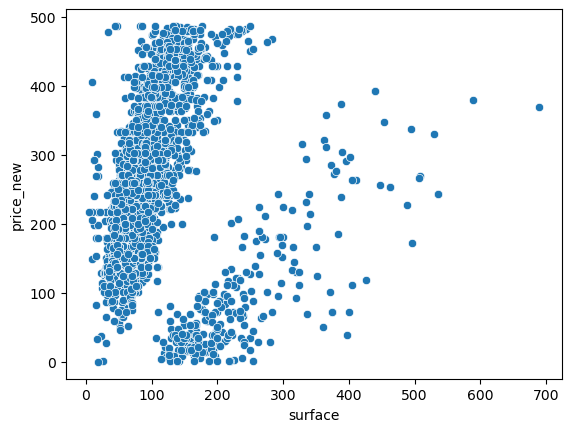

In [20]:
sns.scatterplot(x = df['surface'], y = df['price_new'])

<Axes: xlabel='zipcode_new', ylabel='price_new'>

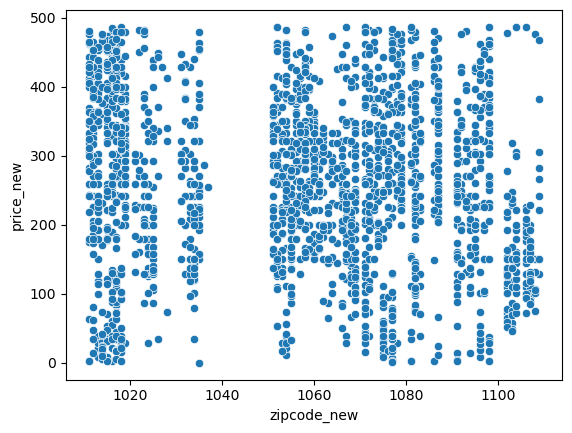

In [21]:
sns.scatterplot(x = df['zipcode_new'], y = df['price_new'])

#### |Sampling of data for Training & Testing | 

In [22]:
X = df[['surface', 'zipcode_new', 'rooms_new']]
y = df['price_new']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3)

#### | Model Building | 

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
model = KNeighborsRegressor(n_neighbors=1)  
model_train = model.fit(X_train, y_train)
print("The Model training is completed")

The Model training is completed


In [26]:
model_train.score(X_train, y_train)

0.9600690987632886

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
pred = model_train.predict(X_test)

In [28]:
mean_squared_error(y_test,pred)

13458.683890577508

In [29]:
sqrt(mean_squared_error(y_test,pred))

116.01156791707243

In [32]:
r2_score(y_test,pred)

0.026781015694203436

In [33]:
error = []
k = []
for i in range(1,10):
    print("When K = ", i)
    model = KNeighborsRegressor(n_neighbors=i)  #### By default it is 5
    model_train = model.fit(X_train, y_train)
    print("The Model training is completed")
    err = round(1- model_train.score(X_train, y_train),2)
    error.append(err)
    k.append(i)

When K =  1
The Model training is completed
When K =  2
The Model training is completed
When K =  3
The Model training is completed
When K =  4
The Model training is completed
When K =  5
The Model training is completed
When K =  6
The Model training is completed
When K =  7
The Model training is completed
When K =  8
The Model training is completed
When K =  9
The Model training is completed


In [34]:
error

[0.04, 0.25, 0.37, 0.42, 0.46, 0.49, 0.51, 0.52, 0.53]

In [35]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [36]:
df_10 = pd.DataFrame({'K':k,'Error':error})

<Axes: xlabel='K', ylabel='Error'>

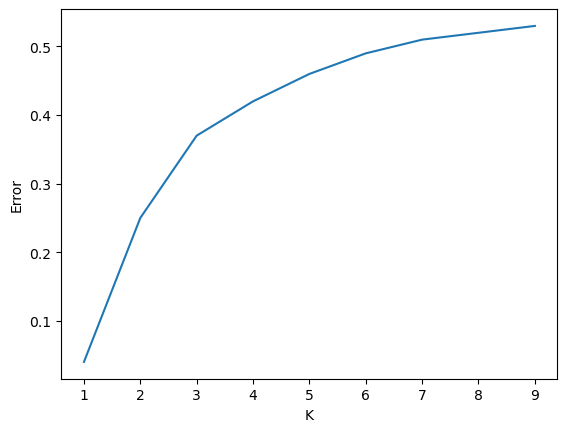

In [37]:
sns.lineplot(x = 'K', y = 'Error', data = df_10)

#### | Save the model |

In [38]:
import joblib

In [40]:
joblib.dump(model, 'KNN_RegV2.sav')

['KNN_RegV2.sav']